In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn.manifold

In [4]:
# import data
iris_dataset = pd.read_csv('../data/Iris.csv')
num_of_datapoints = len(iris_dataset)
classes = iris_dataset['Species'].unique()
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
feature_data = iris_dataset[features]
labels = iris_dataset['Species']
num_of_features = len(features)
num_of_classes = len(classes)

print(f'num of datapoints: {num_of_datapoints}')
print(f'num of features: {num_of_features}')
print(f'num of classes: {num_of_classes}')
print(f'features: {list(features)}')
print(f'classes: {classes}')
print()
print(iris_dataset.info())

num of datapoints: 150
num of features: 4
num of classes: 3
features: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


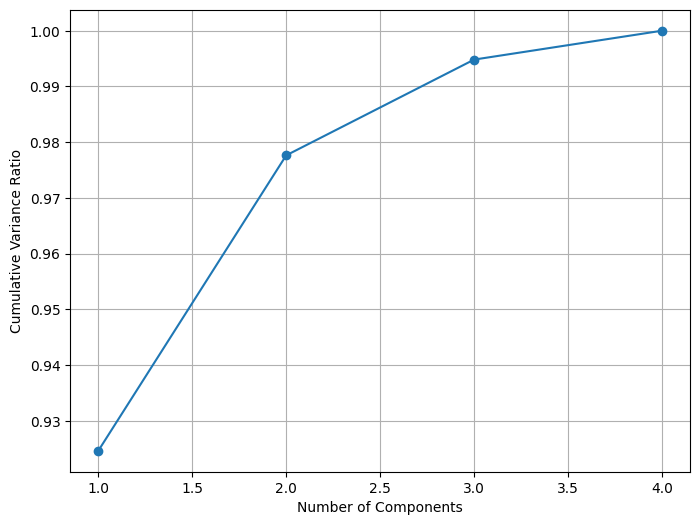

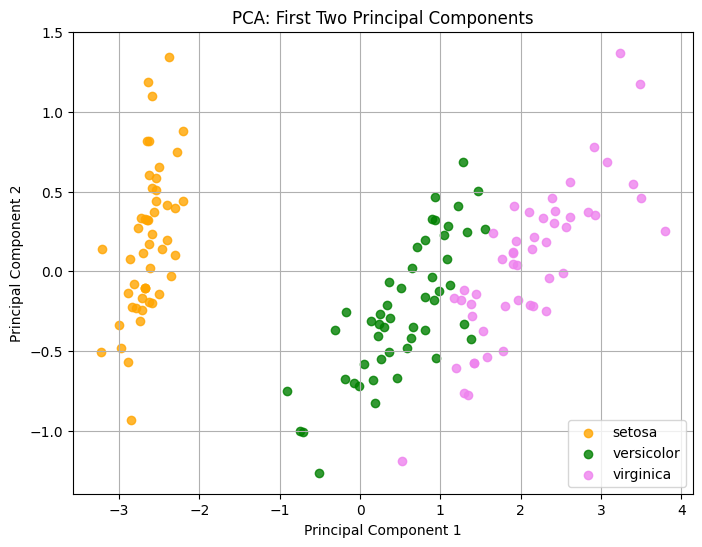

In [5]:
# perform PCA on and plot the data
def pca(data, num_components=2):
    # Initialize PCA
    pca = PCA(n_components=num_components)

    # Fit PCA to the standardized data
    pca.fit(data)

    # Transform the data to the first 'num_components' principal components
    data_pca = pca.transform(data)

    # Create a DataFrame to visualize the transformed data
    df_pca = pd.DataFrame(
        data_pca, columns=[f"PC{i + 1}" for i in range(num_components)]
    )

    # Print the explained variance ratio for each principal component
    explained_variance_ratios = pca.explained_variance_ratio_

    return df_pca, explained_variance_ratios

pca_data, explained_variance_ratios = pca(feature_data, 4)
cumulative_explained_variance = np.cumsum(explained_variance_ratios)

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_of_features+1), cumulative_explained_variance, 'o-')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Ratio")
plt.grid(True)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_data["PC1"][labels=='Iris-setosa'], pca_data["PC2"][labels=='Iris-setosa'], alpha=0.8, c='orange', label='setosa')
plt.scatter(pca_data["PC1"][labels=='Iris-versicolor'], pca_data["PC2"][labels=='Iris-versicolor'], alpha=0.8, c='green', label='versicolor')
plt.scatter(pca_data["PC1"][labels=='Iris-virginica'], pca_data["PC2"][labels=='Iris-virginica'], alpha=0.8, c='violet', label='virginica')
plt.title("PCA: First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

The initial PCA reveals that there are two distinct clusters

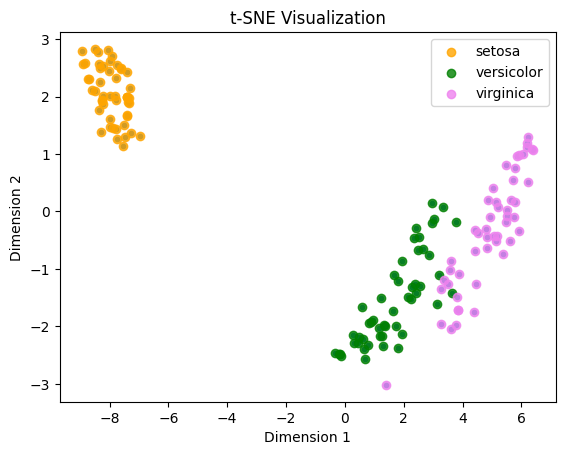

In [11]:
# t-SNE
tsne = sklearn.manifold.TSNE(n_components=2, perplexity=50, n_iter=300)
tsne_result = tsne.fit_transform(feature_data)

# visualize results
plt.figure()
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=10)
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.scatter(tsne_result[:, 0][labels=='Iris-setosa'], tsne_result[:, 1][labels=='Iris-setosa'], alpha=0.8, c='orange', label='setosa')
plt.scatter(tsne_result[:, 0][labels=='Iris-versicolor'], tsne_result[:, 1][labels=='Iris-versicolor'], alpha=0.8, c='green', label='versicolor')
plt.scatter(tsne_result[:, 0][labels=='Iris-virginica'], tsne_result[:, 1][labels=='Iris-virginica'], alpha=0.8, c='violet', label='virginica')
plt.legend()
plt.show()

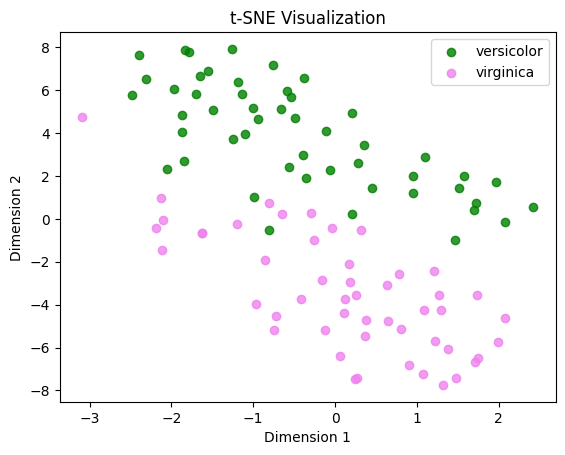

In [31]:
# t-SNE with versicolor and virginica only
versicolor_and_virginica = iris_dataset[iris_dataset['Species'].isin(['Iris-versicolor', 'Iris-virginica'])]
versicolor_and_virginica_labels = versicolor_and_virginica['Species']
tsne = sklearn.manifold.TSNE(n_components=2, perplexity=40, n_iter=300)
tsne_result = tsne.fit_transform(versicolor_and_virginica[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

# visualize results
plt.figure()
plt.scatter(tsne_result[:, 0][versicolor_and_virginica_labels=='Iris-versicolor'], tsne_result[:, 1][versicolor_and_virginica_labels=='Iris-versicolor'], alpha=0.8, c='green', label='versicolor')
plt.scatter(tsne_result[:, 0][versicolor_and_virginica_labels=='Iris-virginica'], tsne_result[:, 1][versicolor_and_virginica_labels=='Iris-virginica'], alpha=0.8, c='violet', label='virginica')
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

col: SepalLengthCm, t-stat: -5.6292, p-val: 0.0000, is-significant: True


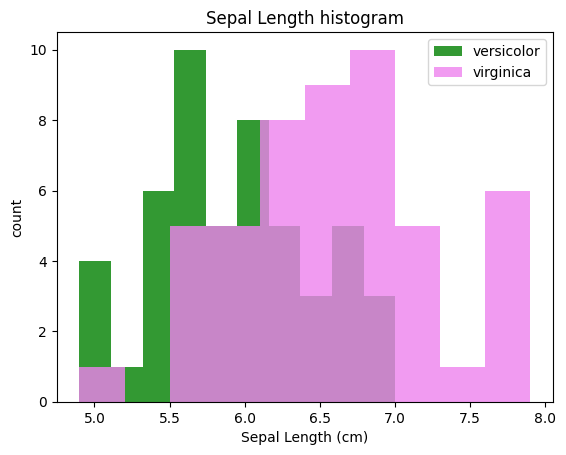

col: SepalWidthCm, t-stat: -3.2058, p-val: 0.0018, is-significant: True


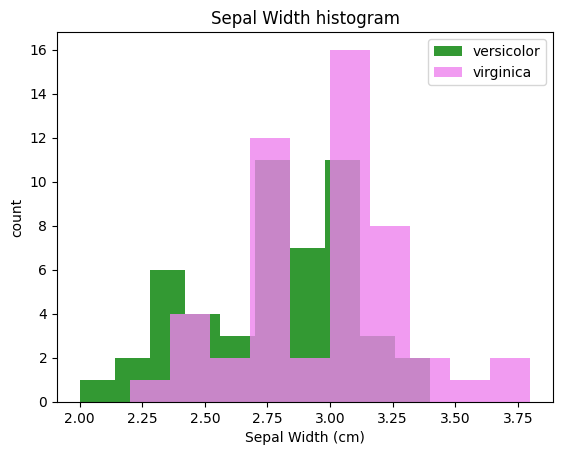

col: PetalLengthCm, t-stat: -12.6038, p-val: 0.0000, is-significant: True


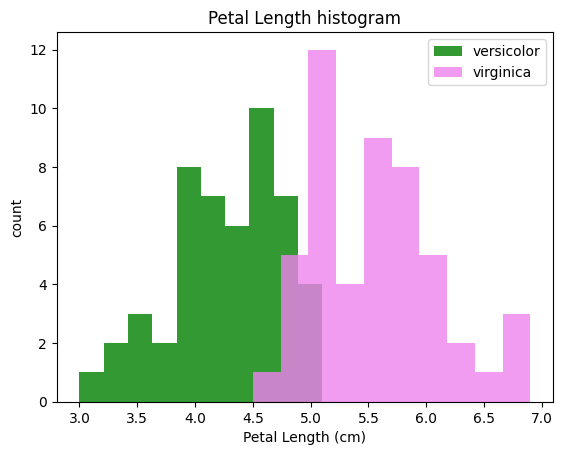

col: PetalWidthCm, t-stat: -14.6254, p-val: 0.0000, is-significant: True


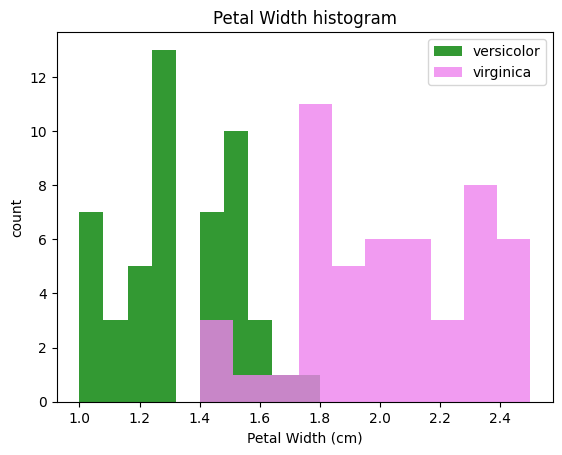

In [15]:
# recursive feature elimination
from scipy.stats import ttest_ind
column_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
column_labels = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
alpha = 0.05

versicolor = iris_dataset[iris_dataset['Species']=='Iris-versicolor'][column_names]
virginica = iris_dataset[iris_dataset['Species']=='Iris-virginica'][column_names]

for column_name, column_label in zip(column_names, column_labels):
    t_statistic, p_value = ttest_ind(versicolor[column_name], virginica[column_name])
    is_significant = p_value < alpha
    print(f'col: {column_name}, t-stat: {t_statistic:.4f}, p-val: {p_value:.4f}, is-significant: {is_significant}')
    plt.figure()
    plt.hist(versicolor[column_name], color='green', alpha=0.8, label='versicolor')
    plt.hist(virginica[column_name], color='violet', alpha=0.8, label='virginica')
    plt.title(f'{column_label} histogram')
    plt.xlabel(f'{column_label} (cm)')
    plt.ylabel('count')
    plt.legend()
plt.show()

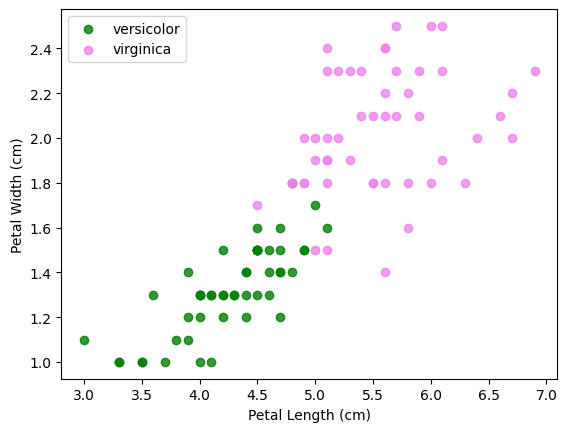

In [16]:
# t-SNE with versicolor and virginica only minus SepalWidthCm
# columns = ['PetalLengthCm', 'PetalWidthCm']

versicolor = iris_dataset[iris_dataset['Species']=='Iris-versicolor'][column_names]
virginica = iris_dataset[iris_dataset['Species']=='Iris-virginica'][column_names]


# perform PCA on and plot the data
def pca(data, num_components=2):
    # Initialize PCA
    pca = PCA(n_components=num_components)

    # Fit PCA to the standardized data
    pca.fit(data)

    # Transform the data to the first 'num_components' principal components
    data_pca = pca.transform(data)

    # Create a DataFrame to visualize the transformed data
    df_pca = pd.DataFrame(
        data_pca, columns=[f"PC{i + 1}" for i in range(num_components)]
    )

    # Print the explained variance ratio for each principal component
    explained_variance_ratios = pca.explained_variance_ratio_

    return df_pca, explained_variance_ratios

pca_data, explained_variance_ratios = pca(feature_data, 4)
cumulative_explained_variance = np.cumsum(explained_variance_ratios)

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_of_features+1), cumulative_explained_variance, 'o-')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Ratio")
plt.grid(True)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_data["PC1"][labels=='Iris-setosa'], pca_data["PC2"][labels=='Iris-setosa'], alpha=0.8, c='orange', label='setosa')
plt.scatter(pca_data["PC1"][labels=='Iris-versicolor'], pca_data["PC2"][labels=='Iris-versicolor'], alpha=0.8, c='green', label='versicolor')
plt.scatter(pca_data["PC1"][labels=='Iris-virginica'], pca_data["PC2"][labels=='Iris-virginica'], alpha=0.8, c='violet', label='virginica')
plt.title("PCA: First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

# visualize results
plt.figure()
plt.scatter(versicolor['PetalLengthCm'], versicolor['PetalWidthCm'], alpha=0.8, c='green', label='versicolor')
plt.scatter(virginica['PetalLengthCm'], virginica['PetalWidthCm'], alpha=0.8, c='violet', label='virginica')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()